# Aviation Risk Evasion analysis
## Objective

- To determine which aircraft to purchase that has the lowest risk inorder for the company to start their new business endeavor.
- To help the company provide quality and safe travels.

## Aviation Accident data Analysis

### Dataframe summary

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read file

with open("AviationData.csv", encoding= "latin1")as f:
    df= pd.read_csv(f, low_memory= False)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


- When the dataframe is loaded it does not display all the columns hence **pd.set_option("display.max_columns", 100)** is used to dispaly all the columns.

In [4]:
# To display all the columns
pd.set_option("display.max_columns", 100)

In [5]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# check rows and columns of the dataset
df.shape
print(f"This dataset has :{df.shape[0]} records and {df.shape[1]} columns")  

This dataset has :88889 records and 31 columns


In [7]:
# checking the columns
print(df.columns)
print(f"The number of columns are:  {len(df.columns)}")

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')
The number of columns are:  31


In [8]:
# Data summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
# Concise summary of dataset
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [10]:
# convert event date from object to datetime
df["Event.Date"] = pd.to_datetime(df["Event.Date"])

In [11]:
# check for type of elements for the columns
df.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In [12]:
# Check descriptive summary of the dataset(Numerical columns)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Event.Date,88889,1999-09-17 17:13:39.354475904,1948-10-24 00:00:00,1989-01-15 00:00:00,1998-07-18 00:00:00,2009-07-01 00:00:00,2022-12-29 00:00:00,NaN
Number.of.Engines,82805.0,1.146585,0.0,1.0,1.0,1.0,8.0,0.44651
Total.Fatal.Injuries,77488.0,0.647855,0.0,0.0,0.0,0.0,349.0,5.48596
Total.Serious.Injuries,76379.0,0.279881,0.0,0.0,0.0,0.0,161.0,1.544084
Total.Minor.Injuries,76956.0,0.357061,0.0,0.0,0.0,0.0,380.0,2.235625
Total.Uninjured,82977.0,5.32544,0.0,0.0,1.0,2.0,699.0,27.913634


In [13]:
# Check statistical summary of categorical columns
df.describe(include= 'O')

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,27758,219,25589,27154,10374,24870,109,4,15,79104,8237,12318,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


### Data cleaning

In [14]:
# create a copy of the dataset
df2= df.copy(deep= True)
df2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
# Change columns to lowercase and remove white spaces
df2.columns= df2.columns.str.lower().str.replace(".", "_")
df2.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

#### Missing Values

In [16]:
# check for missing values
df2.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          13771
dtype: i

In [17]:
# Convert both 'location', 'make' and 'model' columns to lowercase for uniformity
df2[['make', 'model', 'location']] = df2[['make', 'model', 'location']].apply(lambda x: x.str.lower())
df2

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"moose creek, id",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"bridgeport, ca",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,piper,pa24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"saltville, va",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,cessna,172m,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"eureka, ca",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"canton, oh",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"annapolis, md",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,piper,pa-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"hampton, nh",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,bellanca,7eca,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"payson, az",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,american champion aircraft,8gcbc,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"morgan, ut",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,cessna,210n,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [18]:
# Dropping the columns having more missing values
# define how much missing data that is going to be dropped (by 30%)
threshold= 0.3

# generate a count of missing values of every column
missing_counts= df2.isna().sum()

# calculate the number of rows in tha dataframe
total_row= len(df)

# create a list of columns surpassing the threshold
drop_col= [i for i in df2.columns if missing_counts[i]/total_row > threshold]

# drop the columns 
df2.drop(columns=drop_col,inplace=True)

In [19]:
df2

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"moose creek, id",United States,Fatal(2),Destroyed,NC6404,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"bridgeport, ca",United States,Fatal(4),Destroyed,N5069P,piper,pa24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"saltville, va",United States,Fatal(3),Destroyed,N5142R,cessna,172m,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"eureka, ca",United States,Fatal(2),Destroyed,N1168J,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"canton, oh",United States,Fatal(1),Destroyed,N15NY,cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"annapolis, md",United States,Minor,NaN,N1867H,piper,pa-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"hampton, nh",United States,NaN,NaN,N2895Z,bellanca,7eca,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"payson, az",United States,Non-Fatal,Substantial,N749PJ,american champion aircraft,8gcbc,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"morgan, ut",United States,NaN,NaN,N210CU,cessna,210n,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [20]:
df2.dtypes

event_id                          object
investigation_type                object
accident_number                   object
event_date                datetime64[ns]
location                          object
country                           object
injury_severity                   object
aircraft_damage                   object
registration_number               object
make                              object
model                             object
amateur_built                     object
number_of_engines                float64
engine_type                       object
purpose_of_flight                 object
total_fatal_injuries             float64
total_serious_injuries           float64
total_minor_injuries             float64
total_uninjured                  float64
weather_condition                 object
report_status                     object
publication_date                  object
dtype: object

In [21]:
# filling categorical column with unknown
missing_cols= ['location', 'aircraft_damage', 'amateur_built', 'report_status', 'publication_date']

# loop through the columns and fill missing values with unkwown
df2[missing_cols]= df2[missing_cols].fillna("Unknown")

In [22]:
df2.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                     226
injury_severity            1000
aircraft_damage               0
registration_number        1382
make                         63
model                        92
amateur_built                 0
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
report_status                 0
publication_date              0
dtype: int64

In [23]:
# check the unique values in weather condition
print(df2['weather_condition'].unique())

# with a little research I have dicovered that UNK represents the unkwown values in the column
# change Unk to UNK
df2['weather_condition']= df2['weather_condition'].str.replace('Unk', 'UNK')

# fill the missing values UNK
df2['weather_condition']= df2['weather_condition'].fillna('UNK')

['UNK' 'IMC' 'VMC' nan 'Unk']


In [24]:
# create a list
missing_cols= ['country', 'engine_type', 'injury_severity', 'registration_number']

# loop through the columns and fill missing values with unkwown
for col in missing_cols:
    df2[col]= df2[col].fillna("NaN")
    
df2.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                       0
injury_severity               0
aircraft_damage               0
registration_number           0
make                         63
model                        92
amateur_built                 0
number_of_engines          6084
engine_type                   0
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition             0
report_status                 0
publication_date              0
dtype: int64

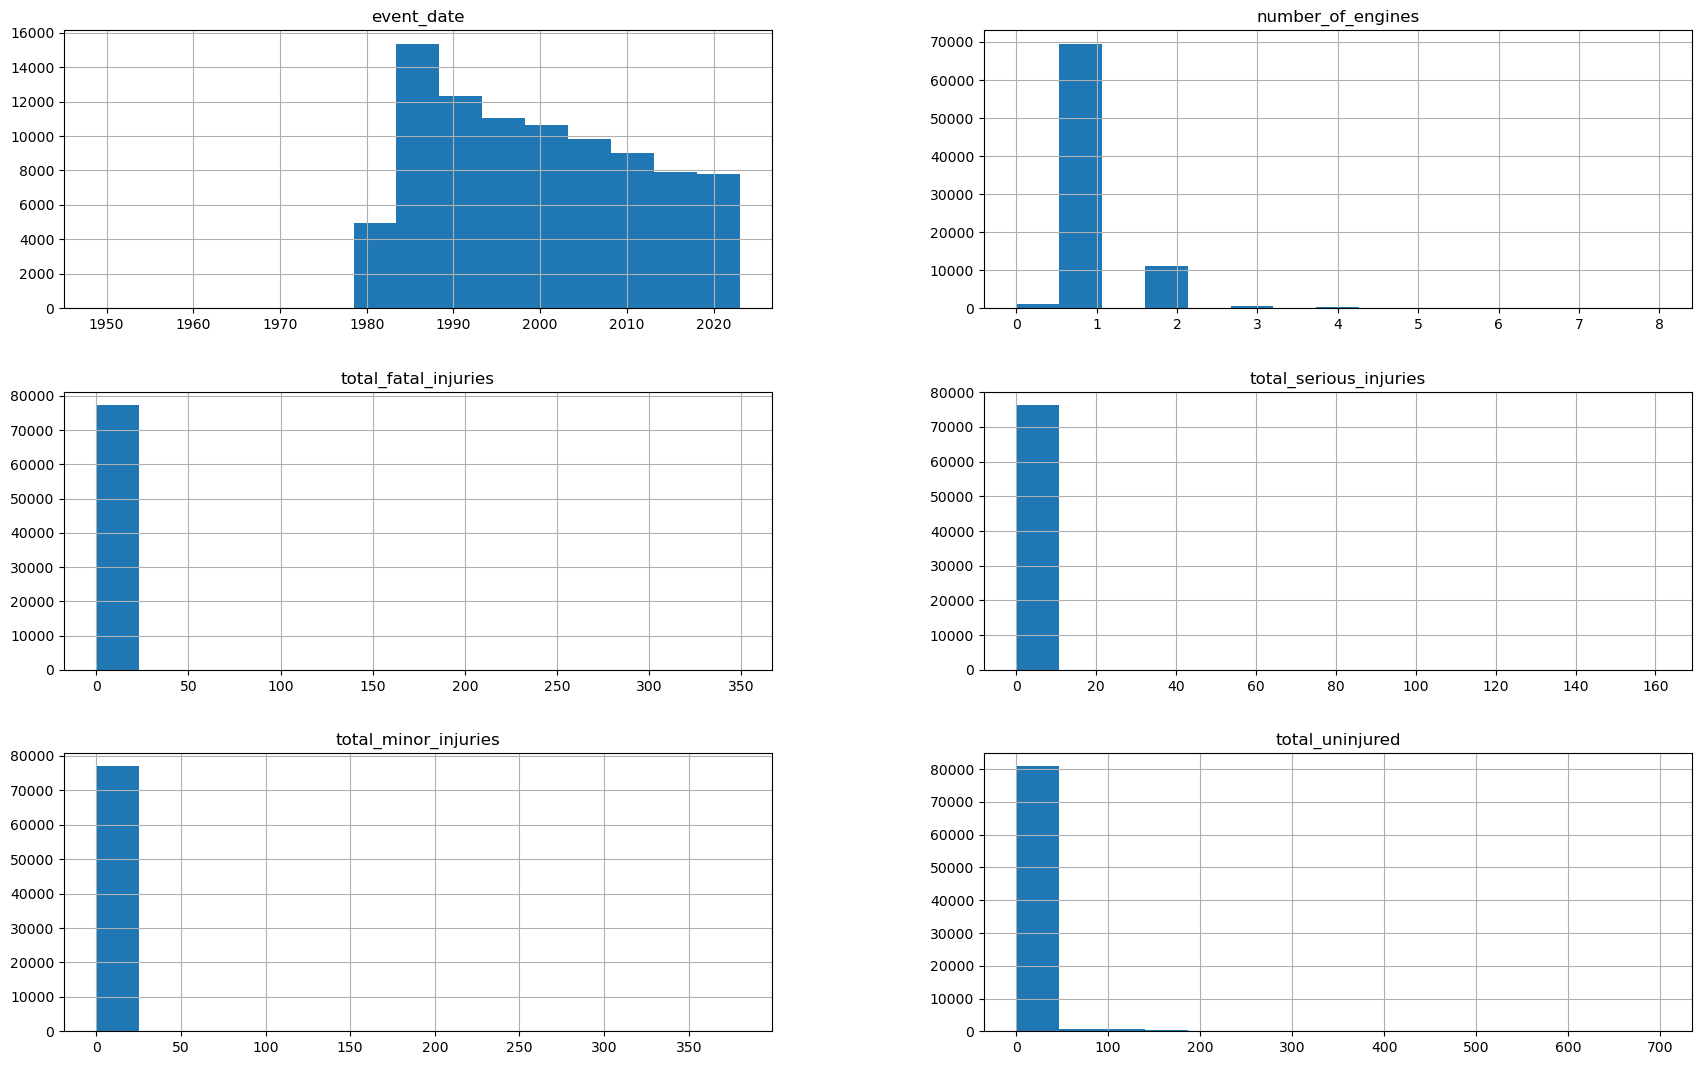

In [25]:
# checking distribution of the numerical columns
df2.hist(bins= 15, figsize=(21,13));

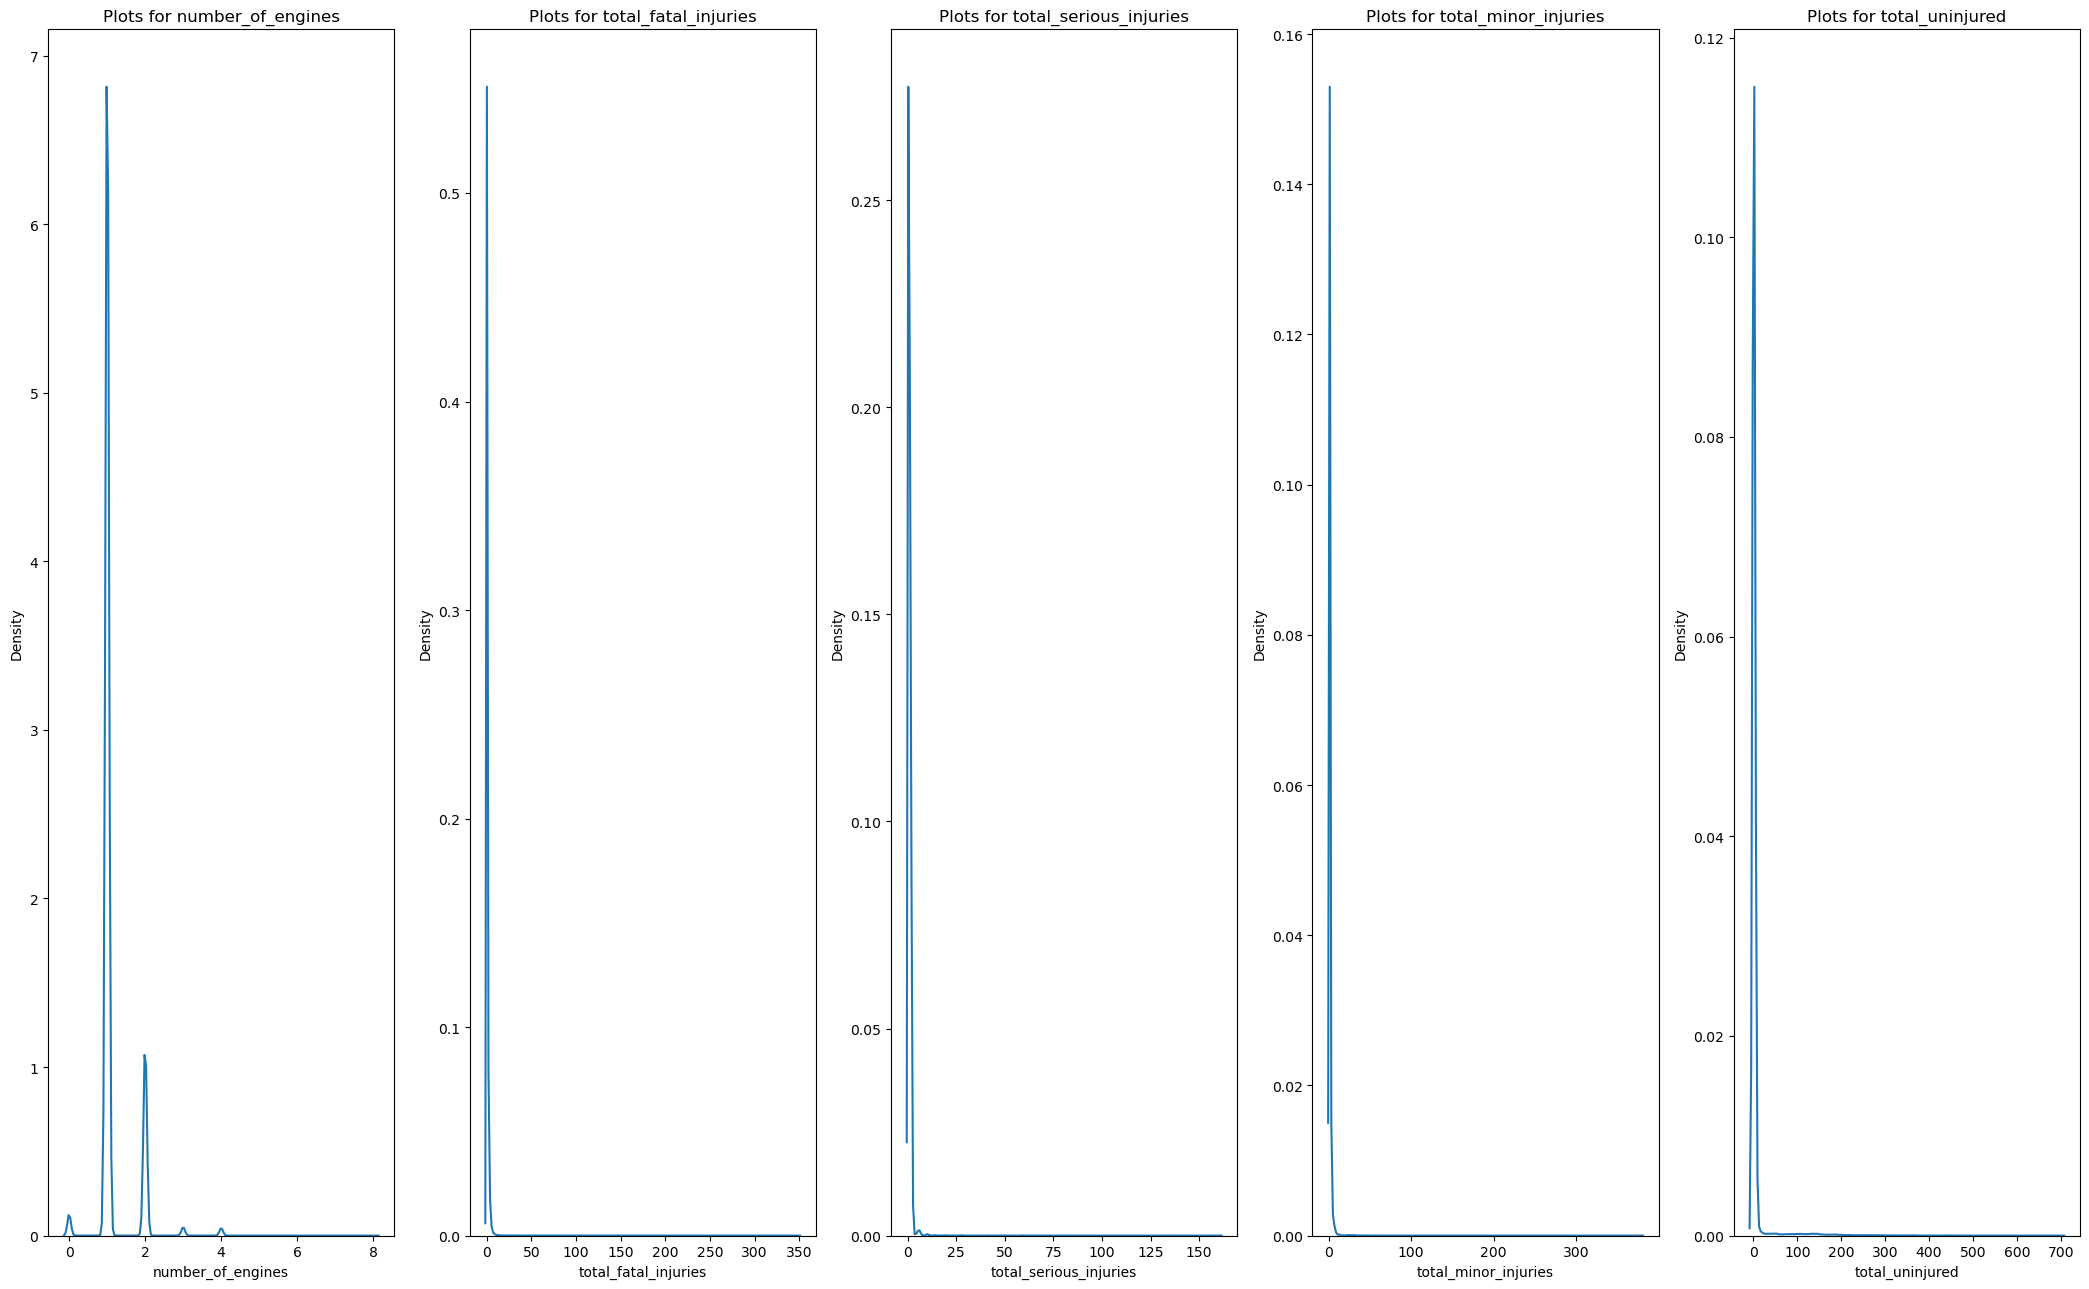

In [26]:
## Check the skewness of the numeric columns
# Select numeric columns
numeric_columns = df2.select_dtypes(include=['number']).columns

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(21, 13))

# Plot KDE for each numeric column
for i, column in enumerate(numeric_columns):
    sns.kdeplot(x=df2[column], ax=axes[i])  
    axes[i].set_title(f'Plots for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
# imputing using median
numeric_columns = df2.select_dtypes(include=['number']).columns

# get the median of the numeric columns
med_cols= df2[numeric_columns].median()

# impute the missing values
df2[numeric_columns]= df2[numeric_columns].fillna(med_cols)

In [28]:
# check missing values
df2.isna().sum()

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
injury_severity              0
aircraft_damage              0
registration_number          0
make                        63
model                       92
amateur_built                0
number_of_engines            0
engine_type                  0
purpose_of_flight         6192
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
report_status                0
publication_date             0
dtype: int64

In [29]:
# drop missing values
df2= df2.dropna()
df2.isna().sum()

event_id                  0
investigation_type        0
accident_number           0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
registration_number       0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
report_status             0
publication_date          0
dtype: int64

In [30]:
df2

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"moose creek, id",United States,Fatal(2),Destroyed,NC6404,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"bridgeport, ca",United States,Fatal(4),Destroyed,N5069P,piper,pa24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"saltville, va",United States,Fatal(3),Destroyed,N5142R,cessna,172m,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"eureka, ca",United States,Fatal(2),Destroyed,N1168J,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"canton, oh",United States,Fatal(1),Destroyed,N15NY,cessna,501,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"reserve, la",United States,Minor,Unknown,N321GD,grumman american avn. corp.,aa-5b,No,1.0,NaN,Instructional,0.0,1.0,0.0,1.0,UNK,Unknown,27-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"annapolis, md",United States,Minor,Unknown,N1867H,piper,pa-28-151,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,UNK,Unknown,29-12-2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"payson, az",United States,Non-Fatal,Substantial,N749PJ,american champion aircraft,8gcbc,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"morgan, ut",United States,NaN,Unknown,N210CU,cessna,210n,No,1.0,NaN,Personal,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown


In [31]:
# check for duplicates
df2.duplicated().sum()

0

In [32]:
# Create a copy of the data
data_copy = df2.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.10)  
q3 = numeric_data.quantile(0.90)  
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df3 = data_copy.copy()


Number of rows before removing outliers: 82639
Number of rows after removing outliers: 75685
Number of rows removed: 6954


In [33]:
df3= df3.reset_index(drop= True)
df3

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"moose creek, id",United States,Fatal(2),Destroyed,NC6404,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,Unknown
1,20001218X45448,Accident,LAX96LA321,1977-06-19,"eureka, ca",United States,Fatal(2),Destroyed,N1168J,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
2,20041105X01764,Accident,CHI79FA064,1979-08-02,"canton, oh",United States,Fatal(1),Destroyed,N15NY,cessna,501,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980
3,20020909X01562,Accident,SEA82DA022,1982-01-01,"pullman, wa",United States,Non-Fatal,Substantial,N2482N,cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,01-01-1982
4,20020909X01561,Accident,NYC82DA015,1982-01-01,"east hanover, nj",United States,Non-Fatal,Substantial,N7967Q,cessna,401b,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75680,20221222106486,Accident,CEN23LA068,2022-12-21,"reserve, la",United States,Minor,Unknown,N321GD,grumman american avn. corp.,aa-5b,No,1.0,NaN,Instructional,0.0,1.0,0.0,1.0,UNK,Unknown,27-12-2022
75681,20221227106491,Accident,ERA23LA093,2022-12-26,"annapolis, md",United States,Minor,Unknown,N1867H,piper,pa-28-151,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,UNK,Unknown,29-12-2022
75682,20221227106497,Accident,WPR23LA075,2022-12-26,"payson, az",United States,Non-Fatal,Substantial,N749PJ,american champion aircraft,8gcbc,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,27-12-2022
75683,20221227106498,Accident,WPR23LA076,2022-12-26,"morgan, ut",United States,NaN,Unknown,N210CU,cessna,210n,No,1.0,NaN,Personal,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75685 entries, 0 to 75684
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                75685 non-null  object        
 1   investigation_type      75685 non-null  object        
 2   accident_number         75685 non-null  object        
 3   event_date              75685 non-null  datetime64[ns]
 4   location                75685 non-null  object        
 5   country                 75685 non-null  object        
 6   injury_severity         75685 non-null  object        
 7   aircraft_damage         75685 non-null  object        
 8   registration_number     75685 non-null  object        
 9   make                    75685 non-null  object        
 10  model                   75685 non-null  object        
 11  amateur_built           75685 non-null  object        
 12  number_of_engines       75685 non-null  float6

### Saving the clean dataset

In [35]:
data= df3.to_csv("Clean_AviationData.csv", index= False)

In [36]:
data1= pd.read_csv('Clean_AviationData.csv')
data1

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"moose creek, id",United States,Fatal(2),Destroyed,NC6404,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,Unknown
1,20001218X45448,Accident,LAX96LA321,1977-06-19,"eureka, ca",United States,Fatal(2),Destroyed,N1168J,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
2,20041105X01764,Accident,CHI79FA064,1979-08-02,"canton, oh",United States,Fatal(1),Destroyed,N15NY,cessna,501,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980
3,20020909X01562,Accident,SEA82DA022,1982-01-01,"pullman, wa",United States,Non-Fatal,Substantial,N2482N,cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,01-01-1982
4,20020909X01561,Accident,NYC82DA015,1982-01-01,"east hanover, nj",United States,Non-Fatal,Substantial,N7967Q,cessna,401b,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75680,20221222106486,Accident,CEN23LA068,2022-12-21,"reserve, la",United States,Minor,Unknown,N321GD,grumman american avn. corp.,aa-5b,No,1.0,NaN,Instructional,0.0,1.0,0.0,1.0,UNK,Unknown,27-12-2022
75681,20221227106491,Accident,ERA23LA093,2022-12-26,"annapolis, md",United States,Minor,Unknown,N1867H,piper,pa-28-151,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,UNK,Unknown,29-12-2022
75682,20221227106497,Accident,WPR23LA075,2022-12-26,"payson, az",United States,Non-Fatal,Substantial,N749PJ,american champion aircraft,8gcbc,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,27-12-2022
75683,20221227106498,Accident,WPR23LA076,2022-12-26,"morgan, ut",United States,NaN,Unknown,N210CU,cessna,210n,No,1.0,NaN,Personal,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown


In [37]:
data1.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'injury_severity', 'aircraft_damage',
       'registration_number', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'report_status', 'publication_date'],
      dtype='object')

### Data Analysis

In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75685 entries, 0 to 75684
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                75685 non-null  object 
 1   investigation_type      75685 non-null  object 
 2   accident_number         75685 non-null  object 
 3   event_date              75685 non-null  object 
 4   location                75685 non-null  object 
 5   country                 75521 non-null  object 
 6   injury_severity         75635 non-null  object 
 7   aircraft_damage         75685 non-null  object 
 8   registration_number     75198 non-null  object 
 9   make                    75685 non-null  object 
 10  model                   75685 non-null  object 
 11  amateur_built           75685 non-null  object 
 12  number_of_engines       75685 non-null  float64
 13  engine_type             72424 non-null  object 
 14  purpose_of_flight       75685 non-null

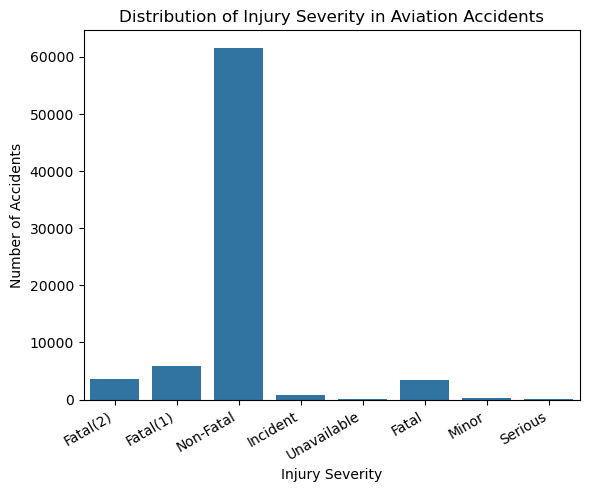

In [39]:
# get the complexity of injury_severity in the dataset
#  use count plot to visualize 
sns.countplot(x= 'injury_severity', data= data1)
plt.xticks(rotation= 30, ha= 'right')

# label the y and x axis 
plt.title('Distribution of Injury Severity in Aviation Accidents')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents');

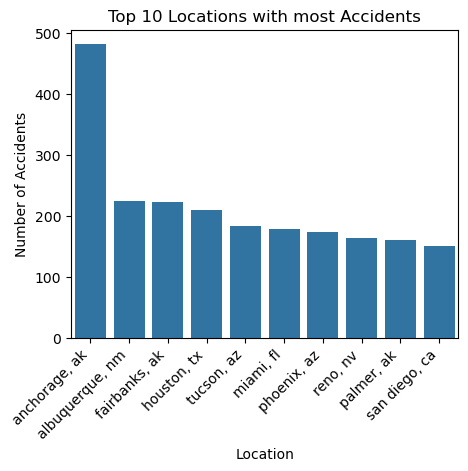

In [40]:
# Exploring The top 10 locations with accidents
# get the top 10 unique values
top_10_loc= data1['location'].value_counts().head(10)

# create a visual using barplot
plt.figure(figsize= (5, 4))
sns.barplot(top_10_loc)

# label the x and y axis and title
plt.title('Top 10 Locations with most Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Location')

# fix the ticks on the y- axis
plt.xticks(rotation= 45, ha= 'right')
plt.show()

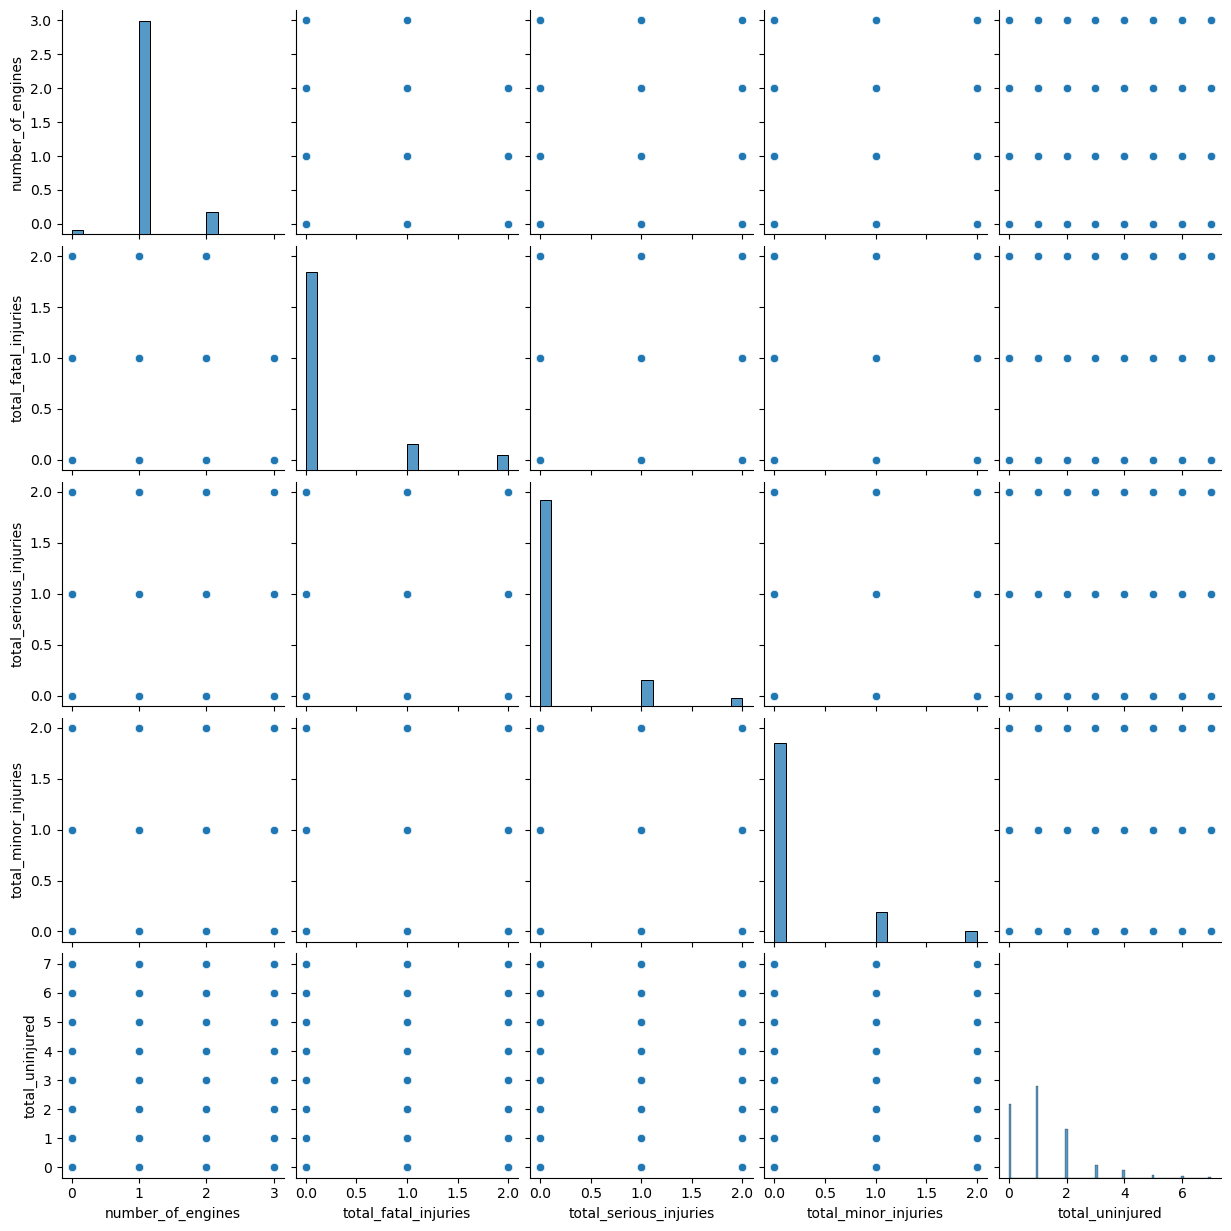

In [41]:
# Relationship between Numeric columns
sns.pairplot(data1)

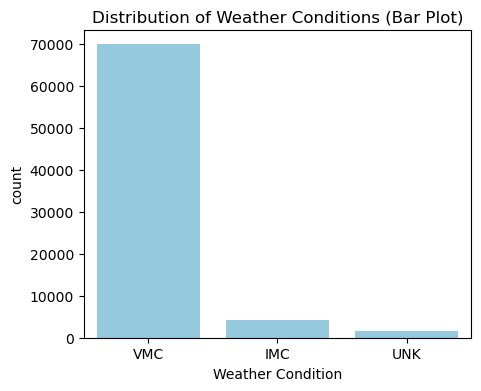

In [42]:
# check relationship between weather condition and aviation accidents
# change values in the weather condition to uppercase
data1['weather_condition']= data1['weather_condition'].str.upper()

# calculate the occurences of weather
weather_count= data1['weather_condition'].value_counts()

# create a visual using barplot
fig, ax = plt.subplots(figsize=(5, 4))
bars= sns.barplot(weather_count, color= 'skyblue')

plt.title('Distribution of Weather Conditions (Bar Plot)')
plt.xlabel('Weather Condition');

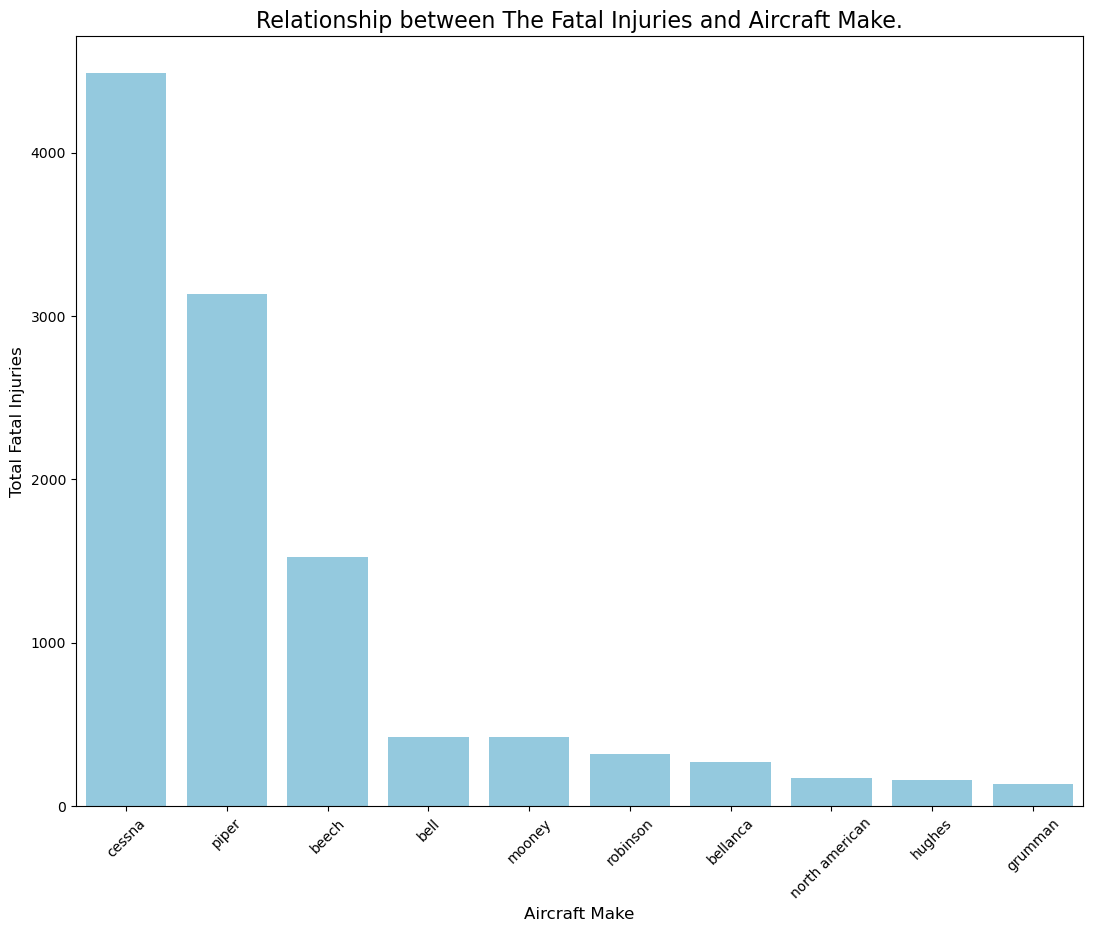

In [43]:
# Exploring relationship between Total Fatality injuries and Aircraft Make 
# Group data for plotting relationship between make and total fatal injuries
make_vs_fatal_injuries = data1.groupby('make')['total_fatal_injuries'].sum().reset_index()
make_vs_fatal_injuries= make_vs_fatal_injuries.sort_values(by='total_fatal_injuries', ascending=False).head(10)

# create subplot
fig, ax= plt.subplots(figsize= (13, 10))

# create visual of make and total fatal injuries
sns.barplot(data=make_vs_fatal_injuries, x='make', y='total_fatal_injuries', color= 'skyblue')

# label x and y axis and plot
ax.set_title("Relationship between The Fatal Injuries and Aircraft Make.", fontsize=16)
ax.set_xlabel("Aircraft Make", fontsize=12)
ax.set_ylabel("Total Fatal Injuries", fontsize=12)
ax.tick_params(axis='x', rotation=45)

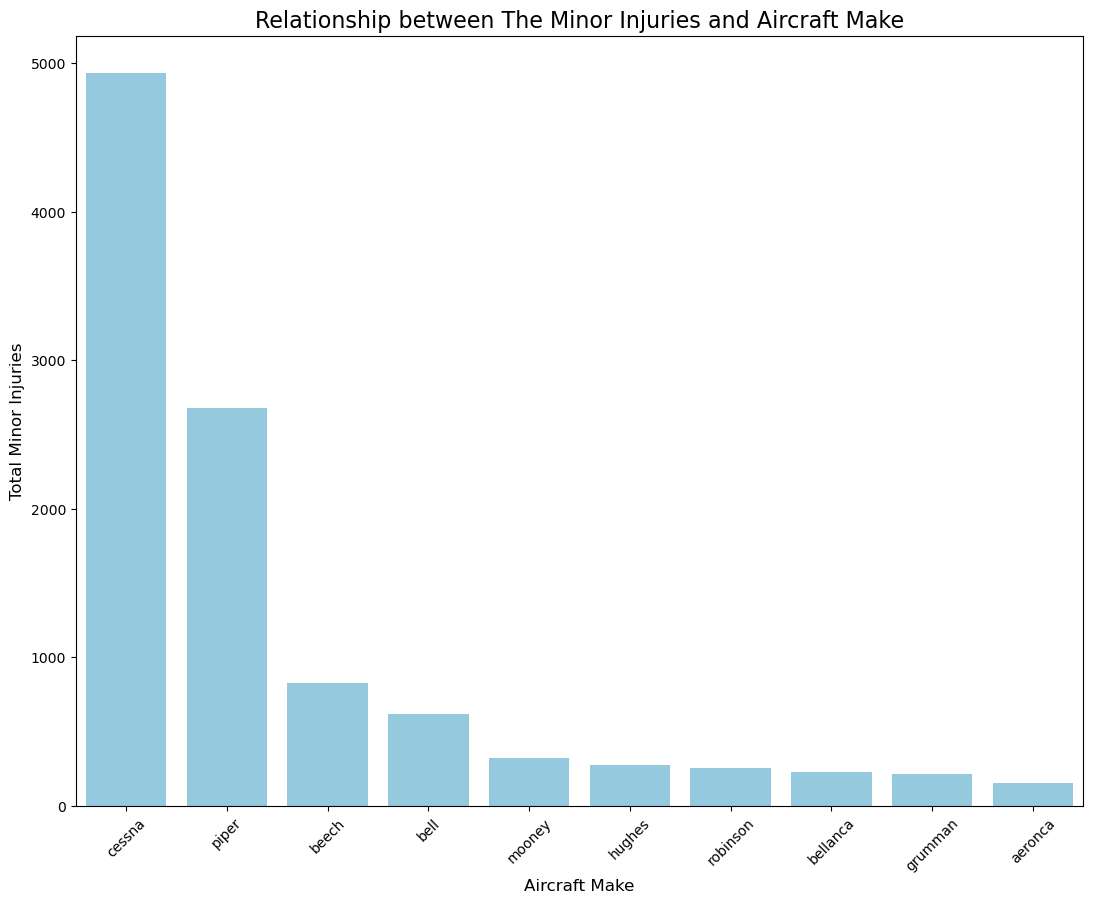

In [44]:
# Explore realationship between total minor injuries and aircraft make.
# Group data for plotting relationship between make and total minor injuries
make_vs_minor_injuries = data1.groupby('make')['total_minor_injuries'].sum().reset_index()
make_vs_minor_injuries = make_vs_minor_injuries.sort_values(by='total_minor_injuries', ascending=False).head(10)

# create subplot
fig, ax= plt.subplots(figsize= (13, 10))

# create visual of make and total minor injuries
sns.barplot(data=make_vs_minor_injuries, x='make', y='total_minor_injuries', color= 'skyblue')

#label x and y axis and plot
ax.set_title("Relationship between The Minor Injuries and Aircraft Make", fontsize=16)
ax.set_xlabel("Aircraft Make", fontsize=12)
ax.set_ylabel("Total Minor Injuries", fontsize=12)
ax.tick_params(axis='x', rotation=45)

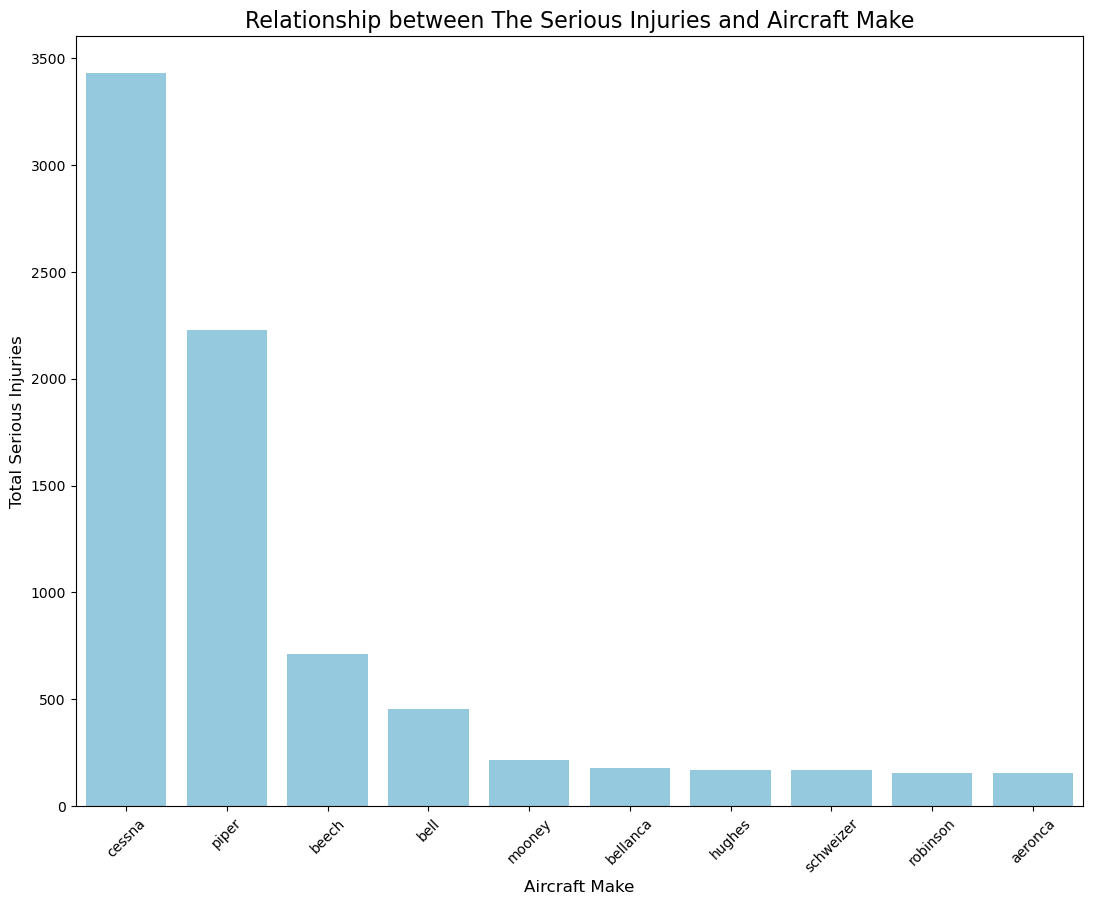

In [45]:
# Exploring relationship between total serious injusties and Aircraft model
# Group data for plotting relationship between make and total serious injuries
make_vs_serious_injuries = data1.groupby('make')['total_serious_injuries'].sum().reset_index()
make_vs_serious_injuries = make_vs_serious_injuries.sort_values(by='total_serious_injuries', ascending=False).head(10)

fig, ax= plt.subplots(figsize= (13, 10))

# create visual of make and total serious injuries
sns.barplot(data=make_vs_serious_injuries, x='make', y='total_serious_injuries', color= 'skyblue')

# label x and y axis and title
ax.set_title("Relationship between The Serious Injuries and Aircraft Make", fontsize=16)
ax.set_xlabel("Aircraft Make", fontsize=12)
ax.set_ylabel("Total Serious Injuries", fontsize=12)
ax.tick_params(axis='x', rotation=45)

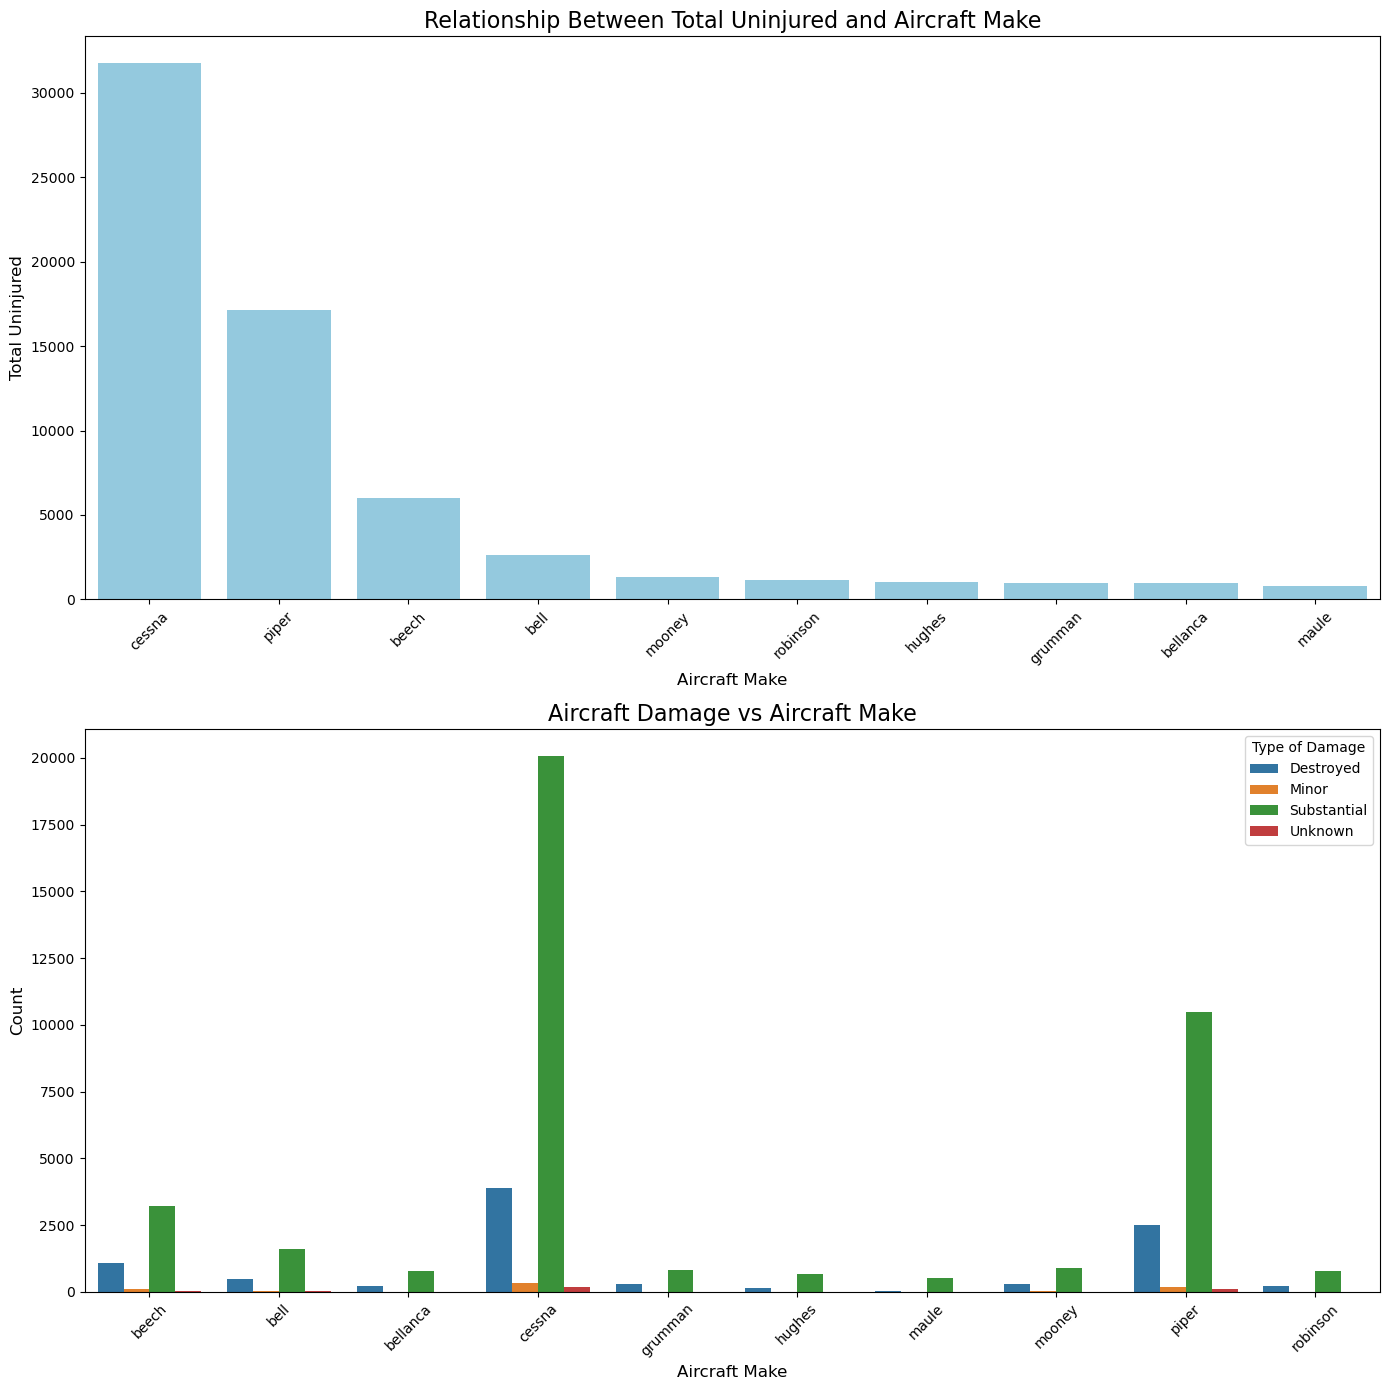

In [46]:
# Explore relationship between total uninjured and aircraft make
# Group data for plotting relationship between make and total uninjured
make_versus_total_uninjured = data1.groupby('make')['total_uninjured'].sum().reset_index()
make_versus_total_uninjured = make_versus_total_uninjured.sort_values(by='total_uninjured', ascending=False).head(10)

# relationship between make and aircraft damage
# group data for plotting relatonship between make and aircraft damage
make_damage = data1.groupby('make')['aircraft_damage'].value_counts().unstack().fillna(0).reset_index()
make_damage = make_damage[make_damage['make'].isin(make_versus_total_uninjured['make'])] 

# create subplots
fig, axis = plt.subplots(2, 1, figsize=(14, 14))

# create visual of make and total uninjured
sns.barplot(data=make_versus_total_uninjured, x='make', y='total_uninjured', color= 'skyblue', ax=axis[0])

# label x nad y axis and plot
axis[0].set_title("Relationship Between Total Uninjured and Aircraft Make", fontsize=16)
axis[0].set_xlabel("Aircraft Make", fontsize=12)
axis[0].set_ylabel("Total Uninjured", fontsize=12)
axis[0].tick_params(axis='x', rotation=45)


# create visual of make and aircraft damage
damage_types = [col for col in make_damage.columns if col != 'make']
make_damage_melted = make_damage.melt(id_vars='make', value_vars=damage_types, var_name='Damage Type', value_name='Count')

sns.barplot(data=make_damage_melted, x='make', y='Count', hue='Damage Type', ax=axis[1])

# label x and y axis amd title
axis[1].set_title("Aircraft Damage vs Aircraft Make", fontsize=16)
axis[1].set_xlabel("Aircraft Make", fontsize=12)
axis[1].set_ylabel("Count", fontsize=12)
axis[1].tick_params(axis='x', rotation=45)
axis[1].legend(title="Type of Damage", loc='upper right') 

# Adjust layout
plt.tight_layout()
plt.show()

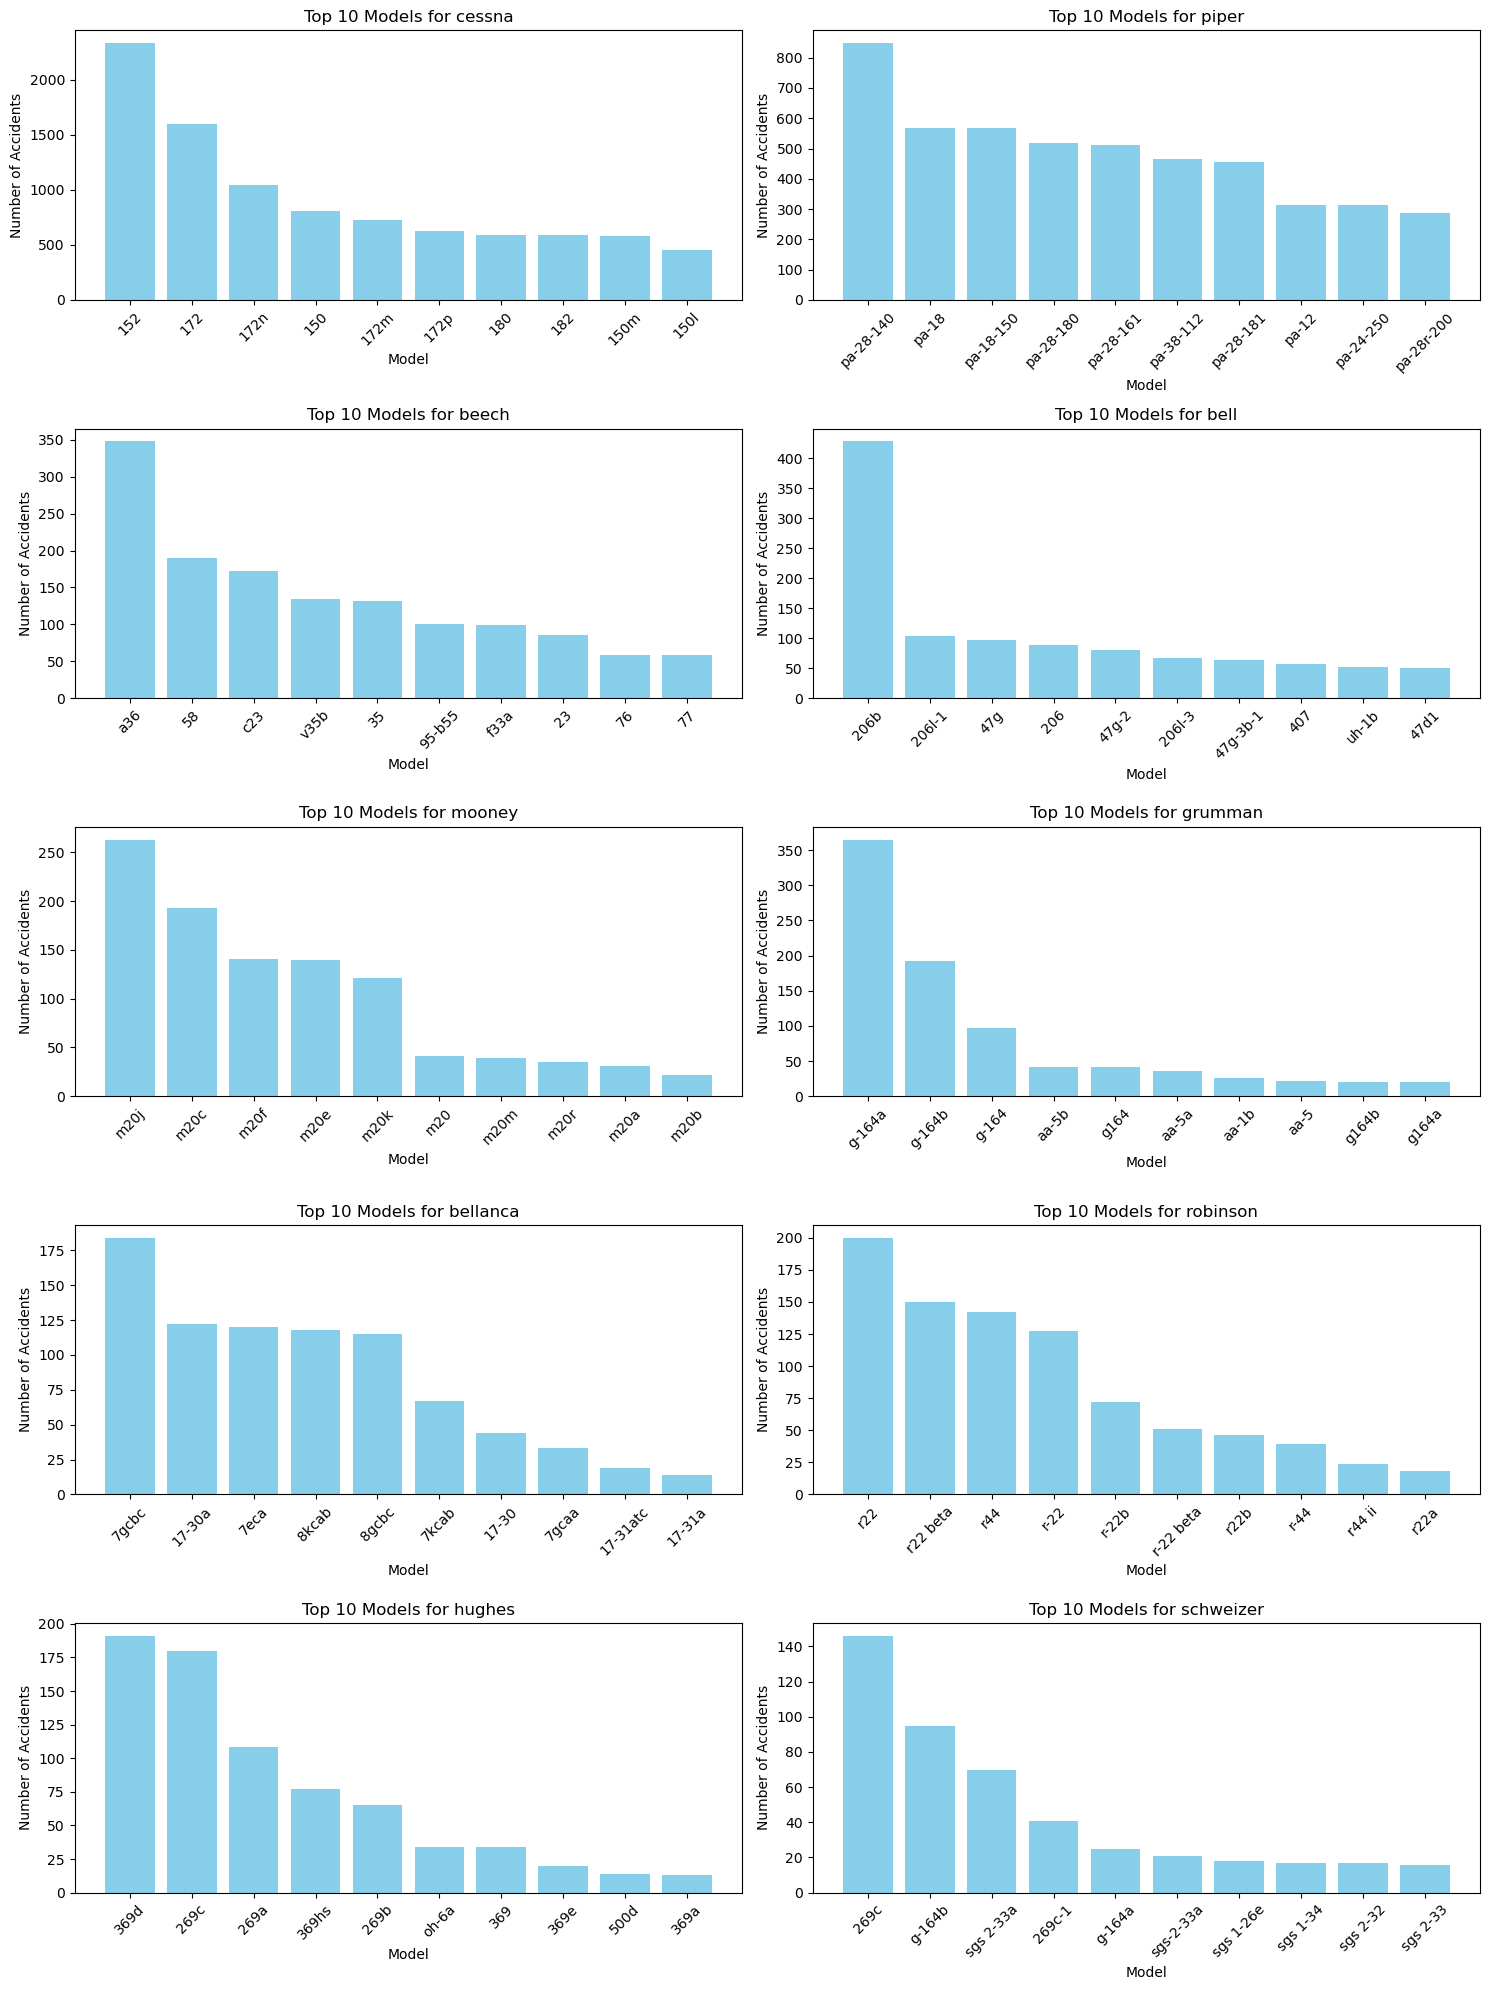

In [47]:
# Evaluate top 10 Models in each Aircraft Make
# define the data set using class
class AviationDataSet:
    def __init__(self, data):          #--> initialize the class to the dataset and store it in data so that is can be used
        self.data = data

# create a function 
    def visualize_top_10_models_by_make(self):
# Identify top 10 makes using (.value_counts())
        top_10_makes = self.data['make'].value_counts().head(10).index
        
# Set up subplots
        fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# flatten the axes for easier iteration
        axes = axes.flatten()

# use for loop to iterate model to each make
        for i, make in enumerate(top_10_makes):
            make_data = self.data[self.data['make'] == make]
            top_10_models = make_data['model'].value_counts().head(10)
            
# create a visual
            axes[i].bar(top_10_models.index, top_10_models.values, color="skyblue")
            
# label the x and y axis
            axes[i].set_title(f'Top 10 Models for {make}')
            axes[i].set_xlabel('Model')
            axes[i].set_ylabel('Number of Accidents')
            axes[i].tick_params(axis='x', rotation=45)

# adjust layout
        plt.tight_layout()
        plt.show()

# call the plot
visual = AviationDataSet(data1)
visual.visualize_top_10_models_by_make()


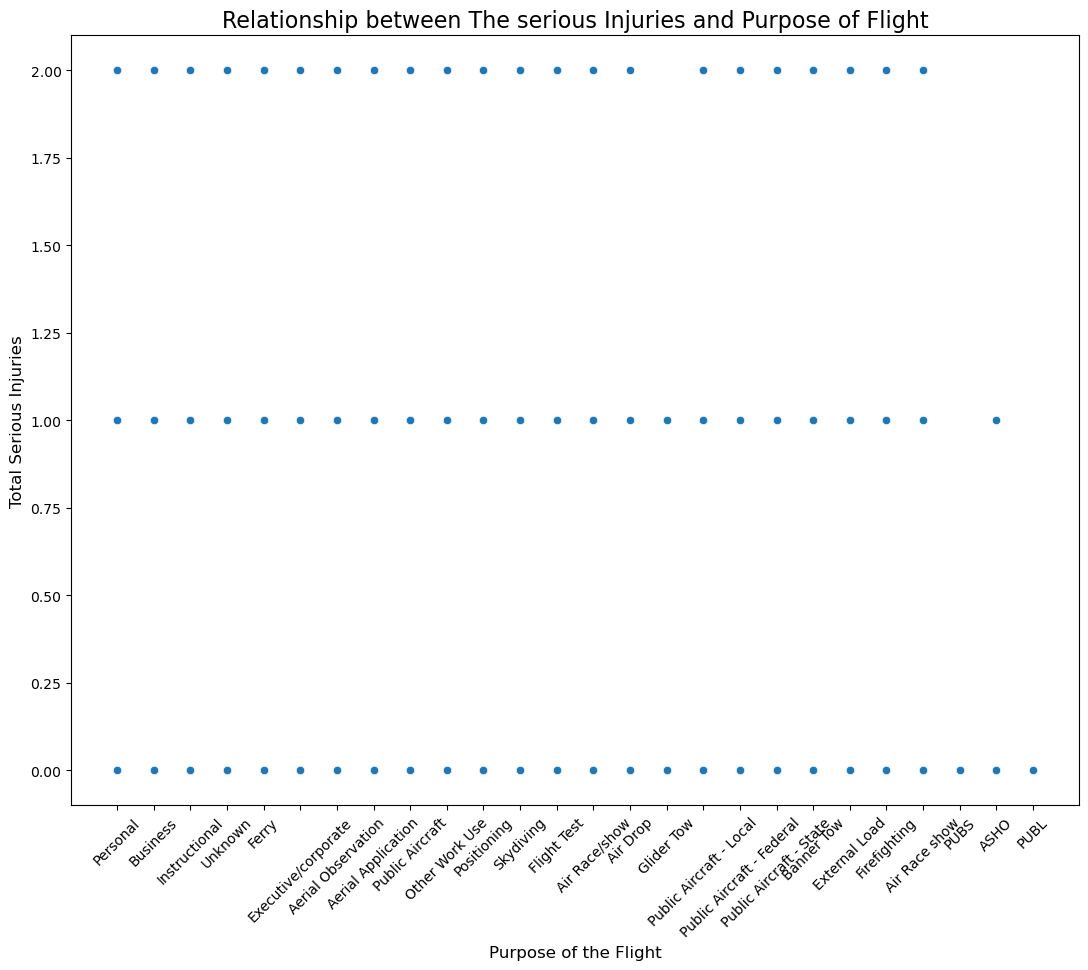

In [48]:
# I was trying to explore the relationship between the Total serious injuries and purpose of flight
# create subplots
fig, ax= plt.subplots(figsize= (13, 10))

# create visual of make and total uninjured
sns.scatterplot(x='purpose_of_flight', y='total_fatal_injuries', data= data1)
ax.set_title("Relationship between The serious Injuries and Purpose of Flight", fontsize=16)
ax.set_xlabel("Purpose of the Flight", fontsize=12)
ax.set_ylabel("Total Serious Injuries", fontsize=12)
ax.tick_params(axis='x', rotation=45)

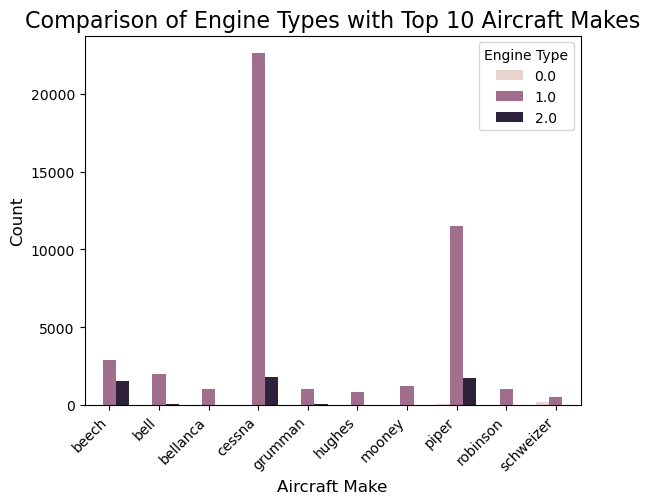

In [49]:
# Understanding the engine type used in the the Aircraft model
# identify the top 10 makes
top_10_makes = data1['make'].value_counts().head(10).index
top_10_data = data1[data1['make'].isin(top_10_makes)]

# group by make and number of engines, then count the occurrences of each engine type
make_engine = top_10_data.groupby(['make', 'number_of_engines']).size().unstack().fillna(0)

# collapse the columns to make one observation
make_engine_melted = pd.melt(make_engine.reset_index(), id_vars='make', var_name='Engine Type', value_name='Count')

# create a visual
sns.barplot(data=make_engine_melted, x='make', y='Count', hue='Engine Type')

# Label x and y axes and title
plt.title("Comparison of Engine Types with Top 10 Aircraft Makes", fontsize=16)
plt.xlabel("Aircraft Make", fontsize=12)
plt.ylabel("Count", fontsize=12)  
plt.xticks(rotation= 45, ha= 'right')
plt.legend(title="Engine Type", loc='upper right')

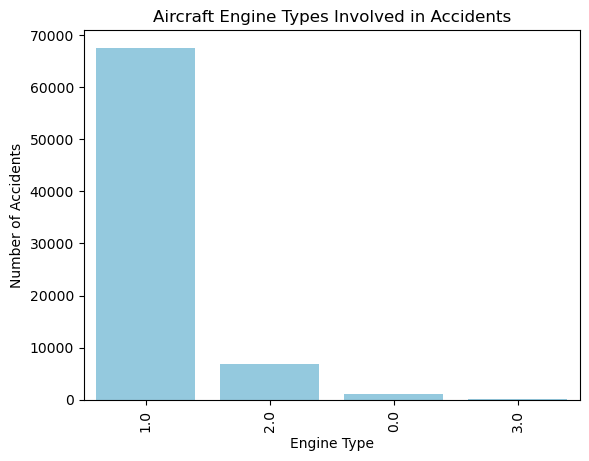

In [50]:
# Exploring the type if engine that has been in most accidents
sns.countplot(data= data1, x= 'number_of_engines', order= data1['number_of_engines'].value_counts().index, color= 'skyblue')
plt.title('Aircraft Engine Types Involved in Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Engine Type')
plt.tick_params(axis='x', rotation=90)


<Axes: >

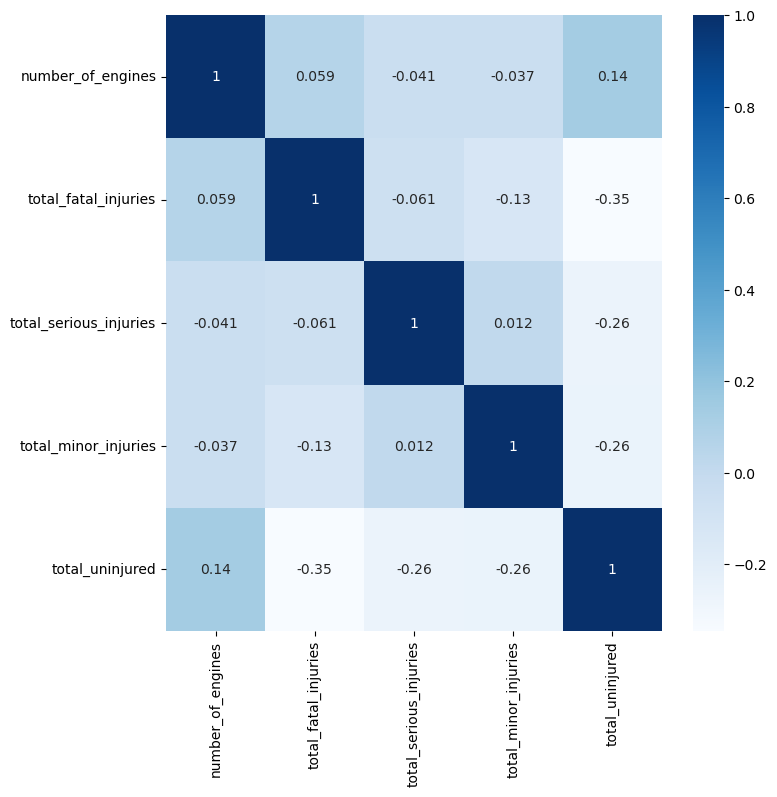

In [51]:
# Exploring the correlation between the numerical variables in the dataset
# filter the data frame for the matrix to only contain numerical columns
num_cols= data1.select_dtypes(include= ['float']).columns
corr_matrix= data1[num_cols].corr()

# get correlation of the columns
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')

Text(0.5, 9.444444444444438, 'Weather Condition')

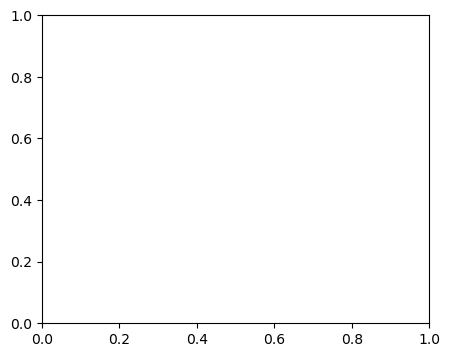

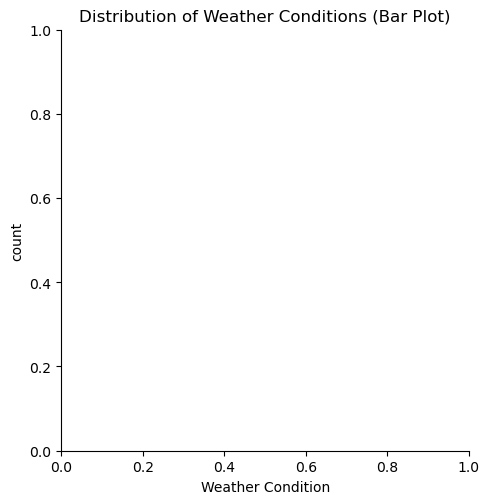

In [54]:
data1['weather_condition']= data1['weather_condition'].str.upper()

# calculate the occurences of weather
weather_count= data1['weather_condition'].value_counts()
event= data1['event_id'].value_counts()

# create a visual using barplot
fig, ax = plt.subplots(figsize=(5, 4))
bars= sns.displot(x= weather_count, y= event, color= 'skyblue')

plt.title('Distribution of Weather Conditions (Bar Plot)')
plt.xlabel('Weather Condition')

